In [1]:

import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']


ModuleNotFoundError: No module named 'pandas'

In [48]:
df=pd.read_csv('weibo_user_update.csv',encoding='GBK')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       781 non-null    int64 
 1   user_name     781 non-null    object
 2   user_image    781 non-null    object
 3   gender        781 non-null    object
 4   class         781 non-null    int64 
 5   message       780 non-null    object
 6   post_num      781 non-null    int64 
 7   follower_num  781 non-null    int64 
 8   followee_num  781 non-null    int64 
 9   ratio=H/J     781 non-null    object
 10  age           781 non-null    int64 
 11  region1       628 non-null    object
 12  region2       628 non-null    object
 13  region        781 non-null    int64 
 14  is_spammer    781 non-null    object
dtypes: int64(7), object(8)
memory usage: 91.6+ KB


In [50]:
df=df[df['is_spammer']!='na']


In [51]:
col=['gender' ,'class' ,'post_num' ,'follower_num' ,'followee_num' ,'ratio=H/J' ,'region','region2','is_spammer']
df=df.loc[:,col]

In [52]:
df.columns

Index(['gender', 'class', 'post_num', 'follower_num', 'followee_num',
       'ratio=H/J', 'region', 'region2', 'is_spammer'],
      dtype='object')

In [58]:
df['region2']=df['region2'].astype('str')

In [59]:
df=df.drop(index=df[df['ratio=H/J']=='#DIV/0!'].index)
df=df.drop(index=df[df['region2']=='其他'].index)
df=df.drop(index=df[df['region2']=='nan'].index)


In [60]:
df['ratio=H/J']=df['ratio=H/J'].astype('float')
up_q = df['ratio=H/J'].quantile(0.75)
low_q = df['ratio=H/J'].quantile(0.25)
dis = 1.5*(up_q - low_q)
up_limit = up_q + dis
low_limit = low_q - dis
df=df[df['ratio=H/J'] < up_limit][df['ratio=H/J'] > low_limit]

C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_9188\3037921609.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[df['ratio=H/J'] < up_limit][df['ratio=H/J'] > low_limit]


In [62]:

a=df['region2'].astype('str')
a=' '.join(a)
a

'吉林 福建 广东 湖南 北京 海外 江苏 福建 江苏 北京 上海 广东 上海 湖北 湖南 江苏 海外 上海 天津 浙江 重庆 江苏 辽宁 河南 北京 河南 上海 江苏 山东 天津 上海 江苏 河南 四川 广东 江苏 广东 江苏 海外 山东 湖南 福建 新疆 广东 广东 辽宁 广东 上海 海外 福建 福建 河北 浙江 广东 广西 江苏 上海 福建 辽宁 湖北 江苏 山西 重庆 吉林 湖南 河南 陕西 北京 江苏 广东 广东 河南 海外 湖北 新疆 重庆 湖南 四川 新疆 浙江 安徽 江苏 福建 四川 江苏 海外 吉林 江苏 江苏 广西 浙江 广东 江西 福建 四川 广东 江苏 广东 海外 广东 黑龙 福建 山东 吉林 河北 台湾 北京 山西 江苏 北京 湖南 江苏 江西 黑龙 吉林 陕西 江苏 浙江 安徽 香港 内蒙 江苏 安徽 广东 湖北 江苏 江苏 陕西 广东 海外 广东 四川 浙江 海外 江苏 江苏 贵州 江苏 湖南 江苏 江苏 黑龙 山东 重庆 江苏 甘肃 上海 广东 安徽 广东 浙江 江苏 广东 河南 河北 重庆 江苏 河北 湖南 内蒙 湖北 广东 江苏 辽宁 山西 山西 山西 福建 浙江 上海 广东 云南 北京 江苏 广西 黑龙 山东 新疆 江苏 内蒙 福建 江苏 重庆 吉林 广东 重庆 上海 山东 海外 上海 广东 香港 江苏 湖北 福建 江苏 辽宁 湖南 黑龙 河北 海外 河南 湖北 山东 山东 福建 河南 广东 广东 湖北 河北 山西 北京 福建 浙江 河南 河南 云南 北京 宁夏 湖北 北京 湖南 北京 云南 福建 广东 江西 山东 陕西 江苏 辽宁 甘肃 海外 新疆 广东 天津 广东 陕西 广东 河南 山东 陕西 上海 北京 湖北 黑龙 湖南 江苏 新疆 山东 甘肃 山东 海南 河南 新疆 北京 湖南 甘肃 广东 湖北 云南 四川 上海 山西 四川 北京 四川 上海 河北 江苏 江苏 北京 山东 河南 山西 浙江 安徽 甘肃 北京 浙江 广东 广西 广东 北京 辽宁 海南 北京 山东 内蒙 河南 河南 浙江 上海 广东 海外 江苏 新疆 上海 新疆 广东 内蒙 广东 河南 浙江 福建 江苏 陕西 吉林 江苏 江苏 北京 广东 湖北 湖北 上海 河南 新疆 江苏 广东 北京 广东 广西 山东'

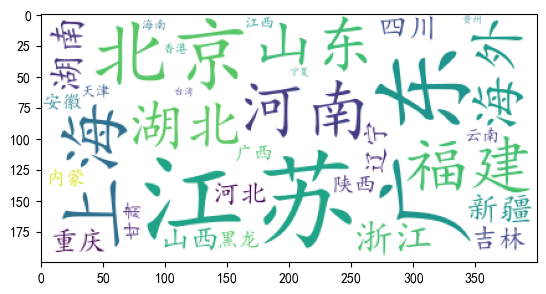

In [63]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS 
wc = WordCloud(background_color="white",font_path='C:/Windows/Fonts/simkai.ttf')
wc.generate(a)
plt.imshow(wc)

([<matplotlib.patches.Wedge at 0x2b8ec59b070>,
 [Text(0.3687342881662333, 1.0363566107911606, "('female', '-1')"),
  Text(-1.0824137546882795, -0.19590932510123432, "('female', '1')"),
  Text(0.13395772746748283, -1.0918128627433128, "('male', '-1')"),
  Text(1.0136791011995272, -0.4271471406802567, "('male', '1')")],
 [Text(0.20112779354521815, 0.5652854240679057, '39.1%'),
  Text(-0.5904075025572433, -0.10685963187340053, '27.5%'),
  Text(0.07306785134589971, -0.5955342887690797, '20.7%'),
  Text(0.5529158733815602, -0.23298934946195818, '12.7%')])

Text(0.5, 1.0, 'gender与is_spammer的关系')

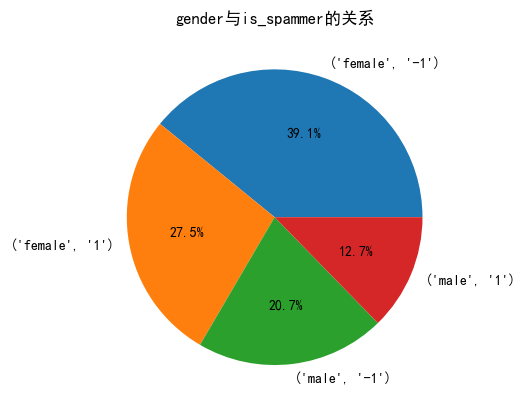

In [160]:
b=df.groupby('gender')['is_spammer'].value_counts()
plt.pie(b,labels=b.index,autopct='%3.1f%%')
plt.title('gender与is_spammer的关系')  
plt.show()

Text(0.5, 1.0, 'region的数量分布')

d:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


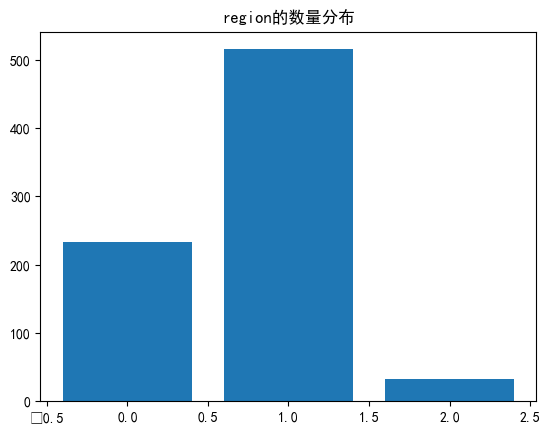

In [66]:
df1=pd.read_csv('weibo_user_update.csv',encoding='GBK')
c=df1['region'].value_counts()
plt.bar(c.index,c)
plt.title('region的数量分布')

<BarContainer object of 14 artists>

Text(0.5, 1.0, 'class的数量分布')

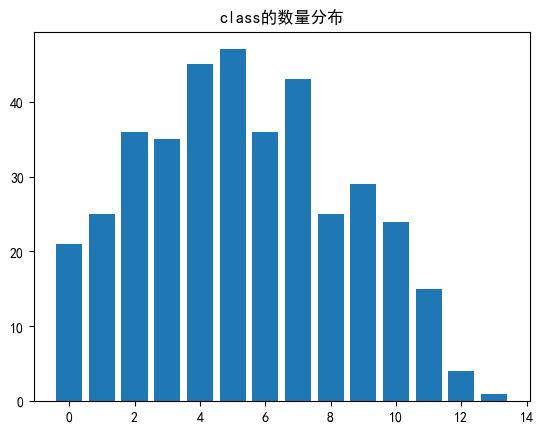

In [172]:
c=df['class'].value_counts()
plt.bar(c.index,c)
plt.title('class的数量分布')

Text(0.5, 1.0, 'ratio 的变化')

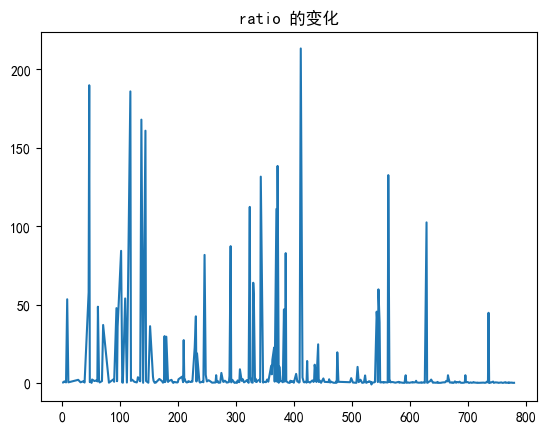

In [177]:
plt.plot(df['ratio=H/J'])
plt.title('ratio 的变化')

([<matplotlib.patches.Wedge at 0x2b900dbf190>,
 [Text(-0.7967747562196802, 0.7583864370168215, '-1.0'),
  Text(0.7967747207170479, -0.7583864743165389, '1.0')],
 [Text(-0.4346044124834619, 0.4136653292819026, '75.8%'),
  Text(0.4346043931183898, -0.413665349627203, '24.2%')])

Text(0.5, 1.0, 'is_spammer与follower_num的数量占比关系')

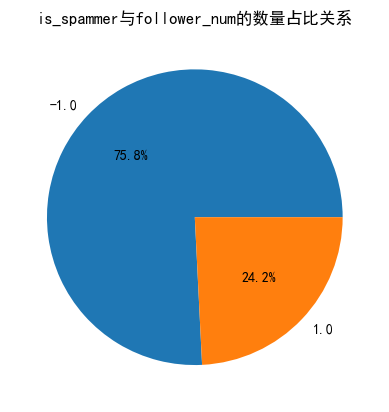

In [205]:
b=df.groupby('is_spammer')['follower_num'].sum()
plt.pie(b,labels=b.index,autopct='%3.1f%%')
plt.title('is_spammer与follower_num的数量占比关系')

([<matplotlib.patches.Wedge at 0x2b900dfcf40>,
 [Text(0.0005267909285355721, 1.0999998738596826, '-1.0'),
  Text(-0.0005266879391143107, -1.0999998739089996, '1.0')],
 [Text(0.00028734050647394836, 0.5999999311961904, '50.0%'),
  Text(-0.0002872843304259876, -0.5999999312230906, '50.0%')])

Text(0.5, 1.0, 'is_spammer与followee_num的数量占比关系')

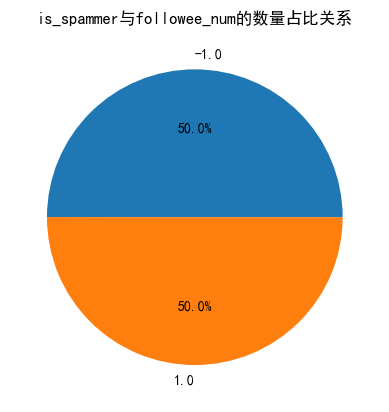

In [206]:
b=df.groupby('is_spammer')['followee_num'].sum()
plt.pie(b,labels=b.index,autopct='%3.1f%%')
plt.title('is_spammer与followee_num的数量占比关系')

([<matplotlib.patches.Wedge at 0x2b8f00483a0>,
 [Text(-0.4968593448870896, 0.98139227192717, '-1'),
  Text(0.49685925300251155, -0.981392318446495, '1')],
 [Text(-0.27101418812023065, 0.5353048755966381, '64.9%'),
  Text(0.2710141380013699, -0.5353049009708154, '35.1%')])

Text(0.5, 1.0, 'is_spammer与post_num的数量占比关系')

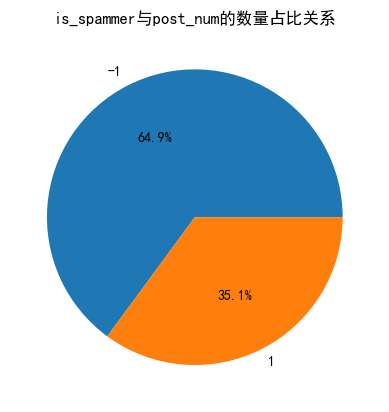

In [189]:
b=df.groupby('is_spammer')['post_num'].sum()
plt.pie(b,labels=b.index,autopct='%3.1f%%')
plt.title('is_spammer与post_num的数量占比关系')

C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_24212\4254234817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


,class,post_num,follower_num,followee_num,ratio=H/J,region,is_spammer
class,1.000000,0.246130,0.126201,-0.142773,0.233988,0.170996,-0.302003
post_num,0.246130,1.000000,0.321567,0.173895,0.253414,0.178839,-0.030691
follower_num,0.126201,0.321567,1.000000,0.329689,0.679215,0.029262,-0.077407
followee_num,-0.142773,0.173895,0.329689,1.000000,0.064767,-0.027736,0.209311
ratio=H/J,0.233988,0.253414,0.679215,0.064767,1.000000,0.070451,-0.135092
region,0.170996,0.178839,0.029262,-0.027736,0.070451,1.000000,0.023102
is_spammer,-0.302003,-0.030691,-0.077407,0.209311,-0.135092,0.023102,1.000000


d:\anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

d:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


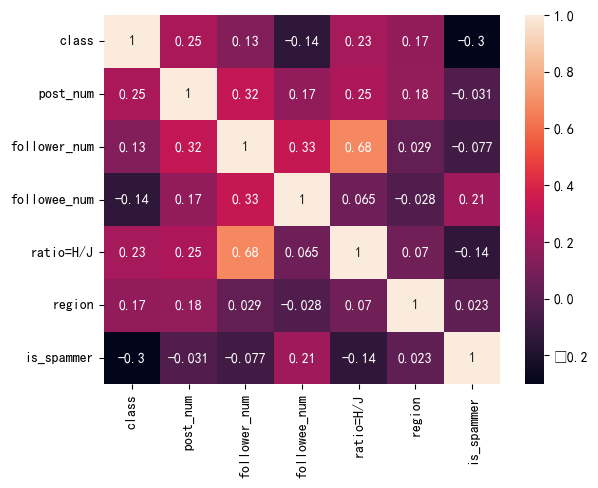

In [199]:

df['is_spammer']=df['is_spammer'].astype('float')
df_corr=df.corr()
df_corr
sns.heatmap(df_corr,annot=True)

In [ ]:
a_counts = df.pivot_table(index = ['gender'],columns =['variety'],values='country',aggfunc='count')
# 修改列名
a_columns = df.columns
a_counts

<AxesSubplot: >

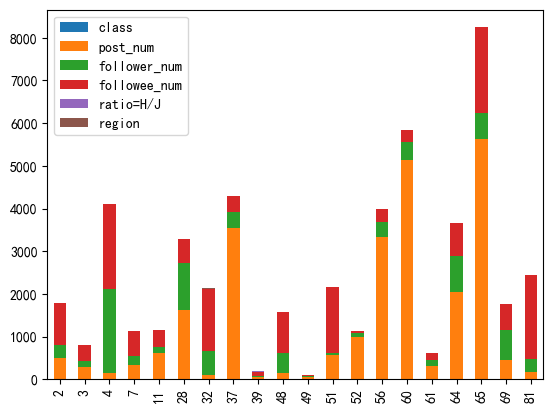

In [70]:
df.iloc[:20,:].plot.bar(stacked=True)

<AxesSubplot: >

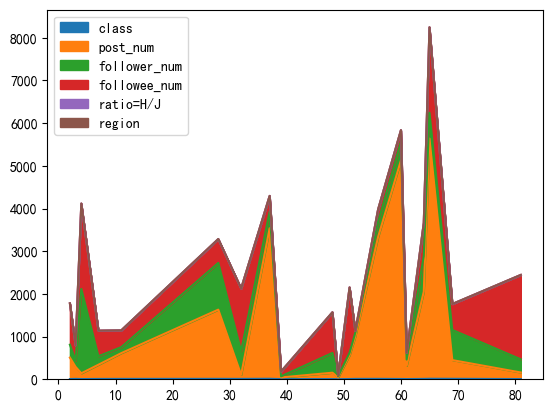

In [71]:
df.iloc[:20,:].plot.area(stacked=True)

d:\anaconda\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


d:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
d:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


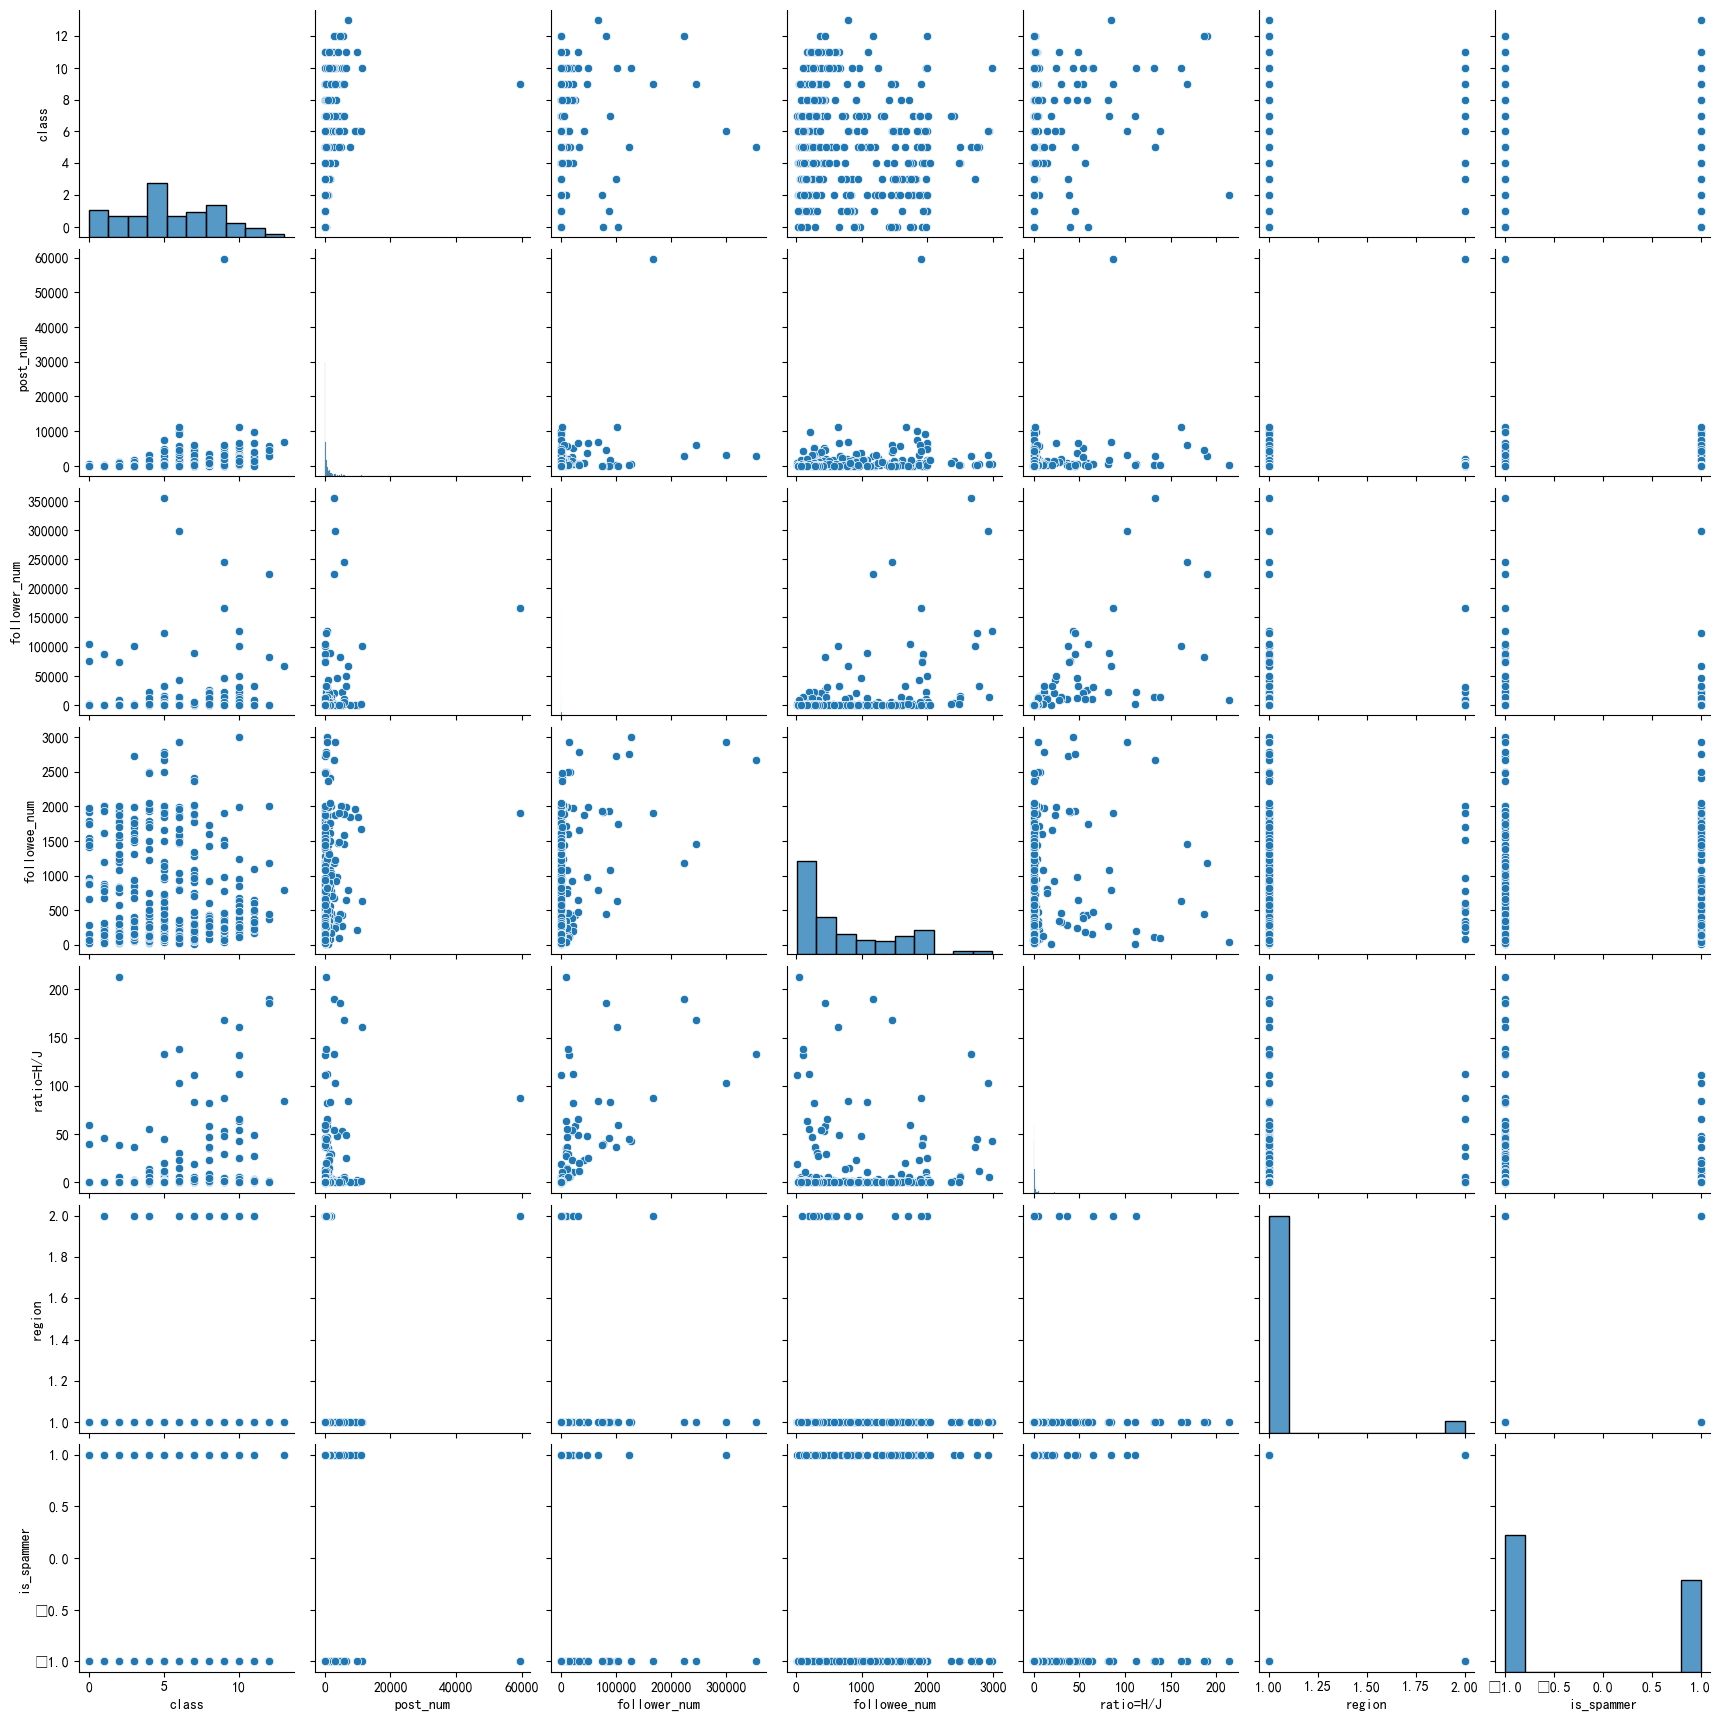

In [200]:
sns.pairplot(df)